### Задание 1

Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [59]:
import pandas as pd

import re

import matplotlib.pyplot as plt

import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

from pylab import rcParams
rcParams['figure.figsize'] = 15,12

In [6]:
players_df = pd.read_csv('nba/Players.csv')

players_df = players_df.dropna()

players_df['height'] = players_df.height.astype('int64')
players_df['weight'] = players_df.weight.astype('int64')
players_df['born'] = players_df.born.astype('int64')

players_df.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
1,1,Cliff Barker,188,83,University of Kentucky,1921,Yorktown,Indiana
4,4,Ralph Beard,178,79,University of Kentucky,1927,Hardinsburg,Kentucky
6,6,Charlie Black,196,90,University of Kansas,1921,Arco,Idaho
7,7,Nelson Bobb,183,77,Temple University,1924,Philadelphia,Pennsylvania
8,8,Jake Bornheimer,196,90,Muhlenberg College,1927,New Brunswick,New Jersey


In [57]:
player_data_df = pd.read_csv('nba/player_data.csv')

player_data_df = player_data_df.dropna()

players_df['height'] = players_df.height.astype('int64')
players_df['weight'] = players_df.weight.astype('int64')
players_df['born'] = players_df.born.astype('int64')

player_data_df.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


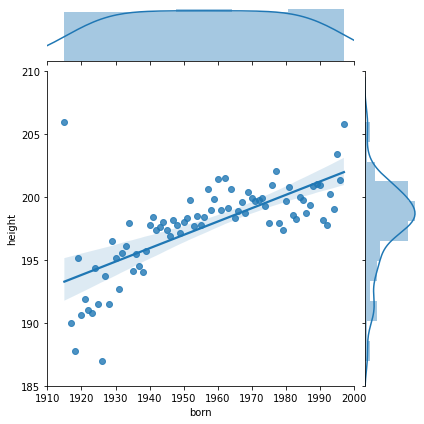

In [51]:
# игроки нба: раньше небо было голубее и игроки выше, а теперь что, одни твинеры?
# оценить связь между годом рождения и ростом игрока

players_for_plot_df = players_df[['born','height']]
players_for_plot_df = players_for_plot_df.groupby(['born']).mean().reset_index()

sns.jointplot( x= 'born', y = 'height', data = players_for_plot_df,
                  kind="reg",
                  xlim=(1910, 2000), ylim=(185, 210))

# ну что ж, гипотеза оказалась в корне не верна: чем позже игрок родился (и вступил в лигу), тем выше его рост,
# то есть теперь в лиге играют более высокие баскетболисты, чем век назад.

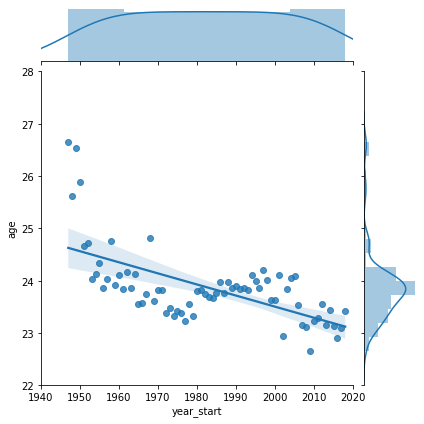

In [79]:
# как изменялся возраст вступления игрока в лигу в зависимости года вступления в лигу
# возможно в какой-то период существования лиги в неё приходили более молодые игроки 

year_pattern = r'\d{4}$'
player_data_df.loc[player_data_df.birth_date.str.contains(year_pattern) == True].head()
player_data_df['born'] = player_data_df.apply(lambda row: int(' '.join(re.findall(year_pattern, row.birth_date))), axis=1)
player_data_df['age'] = player_data_df['year_start'] - player_data_df['born']
player_data_for_plot_df = player_data_df[['year_start','age']]
player_data_for_plot_df = player_data_for_plot_df.groupby(['year_start']).mean().reset_index()

sns.jointplot( x= 'year_start', y = 'age', data = player_data_for_plot_df,
                  kind="reg",
                  xlim=(1940, 2020), ylim=(22, 28))

# в целом существует тренд на снижение среднего возраста вступления в лигу, но он движется циклически, по синусойде